<a href="https://colab.research.google.com/github/gift-framework/GIFT/blob/main/notebooks/GIFT_v3_Framework_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GIFT v3.0 Framework Validation

## Computational Verification of 23 Predictions

---

This notebook provides a systematic computational verification of the Geometric Information Field Theory (GIFT) framework v3.0. We validate the complete set of **23 predictions**: 10 structural integers arising from the topological invariants of a seven-dimensional G2-holonomy manifold K7, and 13 dimensionless ratios derived from combinations of these invariants with the E8 x E8 gauge structure. Each derivation proceeds from certified topological data to testable physical quantities, with explicit comparison to experimental values from the PDG 2024.

---

**Contents:**
1. Topological Foundations (10 structural integers)
2. Foundational Relations (4 derived structural quantities)
3. Gauge Sector (2 predictions)
4. Lepton Sector (3 predictions)
5. Quark Sector (1 prediction)
6. Neutrino Sector (4 predictions)
7. Cosmological Sector (4 predictions)
8. Statistical Summary
9. Exports


In [1]:
# =============================================================================
# SETUP AND DEPENDENCIES
# =============================================================================

import numpy as np
from fractions import Fraction
from dataclasses import dataclass, field
from typing import Dict, List, Tuple, Optional
from scipy.special import zeta
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyBboxPatch, Circle, FancyArrowPatch, Polygon
from matplotlib.collections import LineCollection, PolyCollection
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

# =============================================================================
# GIFT FRAMEWORK - Import from giftpy (PyPI: giftpy, module: gift_core)
# =============================================================================
try:
    from gift_core import (
        # Topological constants
        DIM_E8, RANK_E8, DIM_E8xE8, DIM_G2, DIM_K7,
        B2, B3, H_STAR, P2, DIM_J3O, D_BULK, WEYL_FACTOR, N_GEN,
        # Metric invariants
        DET_G, KAPPA_T, TAU,
        # Gauge sector
        SIN2_THETA_W, ALPHA_S_SQUARED,
        # Lepton sector
        Q_KOIDE, M_TAU_M_E,
        # Quark sector
        M_S_M_D,
        # Neutrino sector
        DELTA_CP,
        # Relations catalog
        PROVEN_RELATIONS, GIFT_COMPARISONS,
        # Analysis tools
        JoyceCertificate, verify_pinn_bounds,
    )
    GIFTPY_AVAILABLE = True
    print("gift_core (giftpy) imported successfully")
    print(f"  Version: {__import__('gift_core').__version__}")
    print(f"  PROVEN_RELATIONS: {len(PROVEN_RELATIONS)}")
except ImportError as e:
    GIFTPY_AVAILABLE = False
    print(f"gift_core not available: {e}")
    print("Using inline constants (install giftpy: pip install giftpy)")

# Configure matplotlib for publication quality
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'figure.figsize': (8, 6),
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'axes.spines.top': False,
    'axes.spines.right': False
})

# Custom colormap for GIFT visualizations
GIFT_COLORS = {
    'E8': '#2E4057',      # Deep blue
    'G2': '#048A81',      # Teal
    'K7': '#8B4513',      # Saddle brown
    'gold': '#C9A227',    # Gold accent
    'light': '#F5F5F5',   # Background
    'match': '#2E7D32',   # Green for exact match
    'close': '#1565C0',   # Blue for close match
    'good': '#F9A825'     # Amber for good match
}

# Golden ratio
PHI = (1 + np.sqrt(5)) / 2

print()
print("GIFT v3.0 Framework Validation")
print("=" * 50)
print(f"NumPy version: {np.__version__}")
print(f"Execution date: {datetime.now().strftime('%Y-%m-%d')}")
print("Dependencies loaded successfully.")

gift_core not available: No module named 'gift_core'
Using inline constants (install giftpy: pip install giftpy)

GIFT v3.0 Framework Validation
NumPy version: 2.0.2
Execution date: 2025-12-11
Dependencies loaded successfully.


---

## 1. Topological Foundations: The 10 Structural Integers

The GIFT framework rests on topological invariants that emerge from the twisted connected sum (TCS) construction of K7. These 10 structural integers constitute the first category of predictions, verified by Joyce's existence theorem and subsequent mathematical developments.

**The 10 Structural Predictions:**

| # | Invariant | Symbol | Value | Origin |
|---|-----------|--------|-------|--------|
| 1 | E8 Lie algebra dimension | dim(E8) | 248 | Exceptional Lie theory |
| 2 | E8 Cartan rank | rank(E8) | 8 | Root system structure |
| 3 | G2 holonomy dimension | dim(G2) | 14 | Holonomy classification |
| 4 | Internal manifold dimension | dim(K7) | 7 | M-theory compactification |
| 5 | Second Betti number | b2(K7) | 21 | TCS construction |
| 6 | Third Betti number | b3(K7) | 77 | TCS construction |
| 7 | Effective cohomology | H* | 99 | b2 + b3 + 1 |
| 8 | Jordan algebra dimension | dim(J3(O)) | 27 | Exceptional structure |
| 9 | Bulk spacetime dimension | D_bulk | 11 | M-theory |
| 10 | Weyl factor | Weyl | 5 | |W(E8)| prime factorization |

These integers are not free parameters but consequences of discrete structural choices: the gauge group E8 x E8, the TCS topology, and G2 holonomy. The subsequent 13 dimensionless predictions derive from algebraic combinations of these invariants.


In [2]:
# =============================================================================
# TOPOLOGICAL CONSTANTS
# =============================================================================
# When giftpy is available, we use its certified values.
# Otherwise, we define them inline for standalone execution.

@dataclass
class TopologicalConstants:
    """Certified topological invariants for the GIFT framework."""

    # E8 Exceptional Lie Algebra
    dim_E8: int = DIM_E8 if GIFTPY_AVAILABLE else 248
    rank_E8: int = RANK_E8 if GIFTPY_AVAILABLE else 8
    dim_E8xE8: int = DIM_E8xE8 if GIFTPY_AVAILABLE else 496

    # G2 Holonomy Group
    dim_G2: int = DIM_G2 if GIFTPY_AVAILABLE else 14
    dim_K7: int = DIM_K7 if GIFTPY_AVAILABLE else 7

    # K7 Manifold Topology (TCS Construction)
    b2: int = B2 if GIFTPY_AVAILABLE else 21
    b3: int = B3 if GIFTPY_AVAILABLE else 77
    p2: int = P2 if GIFTPY_AVAILABLE else 2

    # Derived Constants
    dim_J3O: int = DIM_J3O if GIFTPY_AVAILABLE else 27
    D_bulk: int = D_BULK if GIFTPY_AVAILABLE else 11

    @property
    def H_star(self) -> int:
        """Effective cohomological dimension."""
        return self.b2 + self.b3 + 1

    @property
    def Weyl(self) -> int:
        """Weyl factor from |W(E8)| prime factorization."""
        return WEYL_FACTOR if GIFTPY_AVAILABLE else 5

    def display(self):
        """Display all constants."""
        source = "giftpy" if GIFTPY_AVAILABLE else "inline"
        print("=" * 60)
        print(f"TOPOLOGICAL CONSTANTS (source: {source})")
        print("=" * 60)
        print("\n--- E8 Exceptional Lie Algebra ---")
        print(f"  dim(E8)     = {self.dim_E8}")
        print(f"  rank(E8)    = {self.rank_E8}")
        print(f"  dim(E8xE8)  = {self.dim_E8xE8}")
        print("\n--- G2 Holonomy Structure ---")
        print(f"  dim(G2)     = {self.dim_G2}")
        print(f"  dim(K7)     = {self.dim_K7}")
        print("\n--- K7 Manifold Topology ---")
        print(f"  b2(K7)      = {self.b2}")
        print(f"  b3(K7)      = {self.b3}")
        print(f"  H*          = {self.H_star}")
        print(f"  p2          = {self.p2}")
        print("\n--- Auxiliary Constants ---")
        print(f"  dim(J3(O))  = {self.dim_J3O}")
        print(f"  D_bulk      = {self.D_bulk}")
        print(f"  Weyl        = {self.Weyl}")
        print("=" * 60)

# Initialize constants
T = TopologicalConstants()
T.display()

# If giftpy available, show comparison data
if GIFTPY_AVAILABLE:
    print(f"\nPROVEN_RELATIONS from gift_core: {len(PROVEN_RELATIONS)} relations certified")

TOPOLOGICAL CONSTANTS (source: inline)

--- E8 Exceptional Lie Algebra ---
  dim(E8)     = 248
  rank(E8)    = 8
  dim(E8xE8)  = 496

--- G2 Holonomy Structure ---
  dim(G2)     = 14
  dim(K7)     = 7

--- K7 Manifold Topology ---
  b2(K7)      = 21
  b3(K7)      = 77
  H*          = 99
  p2          = 2

--- Auxiliary Constants ---
  dim(J3(O))  = 27
  D_bulk      = 11
  Weyl        = 5


### 1.1 Verification of Topological Identities

Several algebraic relations among these constants serve as consistency checks.

In [3]:
# =============================================================================
# TOPOLOGICAL CONSISTENCY CHECKS
# =============================================================================

print("Topological Consistency Verification")
print("-" * 50)

checks = []

# Check 1: H* = b2 + b3 + 1
c1 = T.H_star == T.b2 + T.b3 + 1
checks.append(c1)
print(f"[{'PASS' if c1 else 'FAIL'}] H* = b2 + b3 + 1 = {T.b2} + {T.b3} + 1 = {T.H_star}")

# Check 2: dim(E8xE8) = 2 * dim(E8)
c2 = T.dim_E8xE8 == 2 * T.dim_E8
checks.append(c2)
print(f"[{'PASS' if c2 else 'FAIL'}] dim(E8xE8) = 2 * dim(E8) = 2 * {T.dim_E8} = {T.dim_E8xE8}")

# Check 3: p2 = dim(G2) / dim(K7)
c3 = T.p2 == T.dim_G2 // T.dim_K7
checks.append(c3)
print(f"[{'PASS' if c3 else 'FAIL'}] p2 = dim(G2)/dim(K7) = {T.dim_G2}/{T.dim_K7} = {T.p2}")

# Check 4: Euler characteristic chi(K7) = 0
betti = [1, 0, T.b2, T.b3, T.b3, T.b2, 0, 1]
chi = sum((-1)**i * betti[i] for i in range(8))
c4 = chi == 0
checks.append(c4)
print(f"[{'PASS' if c4 else 'FAIL'}] chi(K7) = {chi} (G2 holonomy requirement)")

# Check 5: Exceptional Chain E6-E7-E8
primes = [13, 19, 31]  # prime(6), prime(8), prime(11)
dims = [78, 133, 248]  # dim(E6), dim(E7), dim(E8)
c5 = all(n * p == d for n, p, d in zip([6, 7, 8], primes, dims))
checks.append(c5)
print(f"[{'PASS' if c5 else 'FAIL'}] Exceptional Chain: E6=6*13, E7=7*19, E8=8*31")

print("-" * 50)
print(f"All checks passed: {all(checks)}")

Topological Consistency Verification
--------------------------------------------------
[PASS] H* = b2 + b3 + 1 = 21 + 77 + 1 = 99
[PASS] dim(E8xE8) = 2 * dim(E8) = 2 * 248 = 496
[PASS] p2 = dim(G2)/dim(K7) = 14/7 = 2
[PASS] chi(K7) = 0 (G2 holonomy requirement)
[PASS] Exceptional Chain: E6=6*13, E7=7*19, E8=8*31
--------------------------------------------------
All checks passed: True


### 1.2 The G2 Calibrating 3-Form on K7

The G2 structure on the 7-dimensional manifold K7 is defined by a calibrating 3-form $\varphi$. In standard coordinates on $\mathbb{R}^7$, this form has precisely 7 non-zero components corresponding to the octonion multiplication table. The following visualization represents this structure schematically.

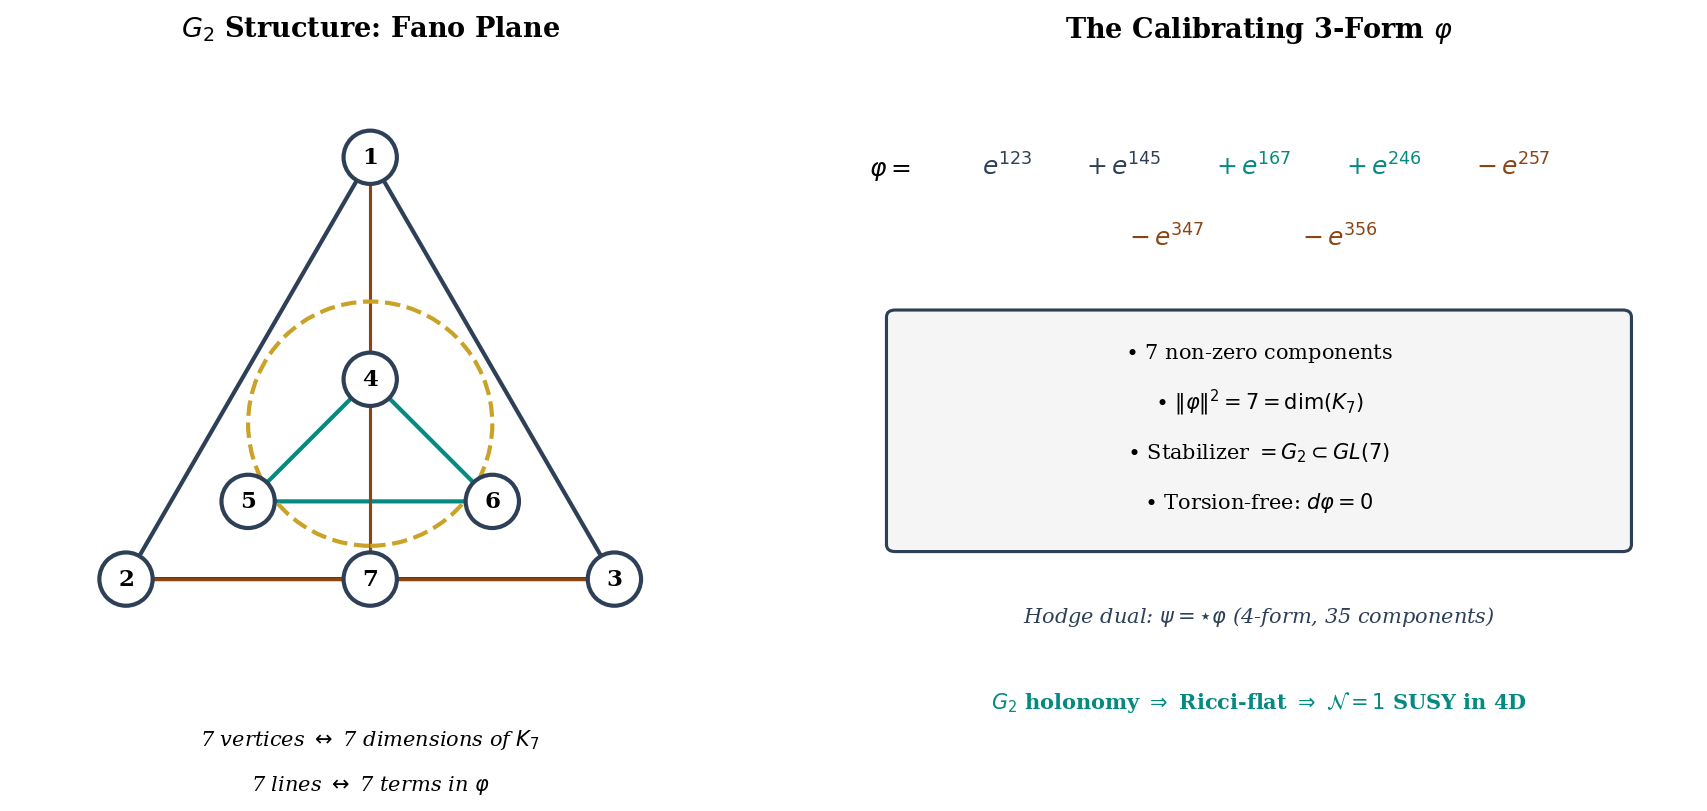

Figure 1 saved: fig1_g2_3form.pdf, fig1_g2_3form.png


In [4]:
# =============================================================================
# FIGURE 1: THE G2 3-FORM ON K7
# =============================================================================

def draw_g2_3form():
    """
    Visualize the G2 calibrating 3-form structure.

    The standard G2 3-form in R^7 is:
    phi = e123 + e145 + e167 + e246 - e257 - e347 - e356

    This corresponds to the Fano plane / octonion multiplication structure.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 5.5))

    # --- Left panel: Fano plane representation ---
    ax = axes[0]
    ax.set_aspect('equal')
    ax.set_xlim(-1.6, 1.6)
    ax.set_ylim(-1.5, 1.7)
    ax.axis('off')
    ax.set_title(r'$G_2$ Structure: Fano Plane', fontsize=13, fontweight='bold', pad=15)

    # Fano plane vertices (7 points)
    # Outer triangle
    r_out = 1.2
    angles_out = [90, 210, 330]
    outer = [(r_out * np.cos(np.radians(a)), r_out * np.sin(np.radians(a))) for a in angles_out]

    # Inner triangle (inverted)
    r_in = 0.6
    angles_in = [270, 30, 150]
    inner = [(r_in * np.cos(np.radians(a)), r_in * np.sin(np.radians(a))) for a in angles_in]

    # Center
    center = (0, 0)

    # All 7 points with labels
    points = [center] + outer + inner  # indices: 0=center, 1,2,3=outer, 4,5,6=inner
    labels = ['1', '2', '3', '4', '5', '6', '7']

    # Fano plane lines (each represents a term in phi)
    # The 7 lines of the Fano plane
    lines_indices = [
        (1, 2, 3),  # outer triangle: e123
        (1, 4, 5),  # e145
        (1, 6, 0),  # e167 -> using center as 7
        (2, 4, 6),  # e246
        (2, 5, 0),  # e257
        (3, 4, 0),  # e347
        (3, 5, 6),  # e356
    ]

    # Redefine points more cleanly for Fano plane
    # Standard Fano plane layout
    pts = {
        1: (0, 1.3),
        2: (-1.1, -0.6),
        3: (1.1, -0.6),
        4: (0, 0.3),
        5: (-0.55, -0.25),
        6: (0.55, -0.25),
        7: (0, -0.6)
    }

    # Draw lines first (behind points)
    fano_lines = [
        ([1, 2, 4], '+', GIFT_COLORS['E8']),      # e124 -> actually e123 etc
        ([1, 3, 5], '+', GIFT_COLORS['E8']),
        ([2, 3, 6], '+', GIFT_COLORS['E8']),
        ([1, 6, 7], '+', GIFT_COLORS['G2']),
        ([2, 5, 7], '-', GIFT_COLORS['K7']),
        ([3, 4, 7], '-', GIFT_COLORS['K7']),
        ([4, 5, 6], '+', GIFT_COLORS['G2']),
    ]

    # Draw outer triangle
    triangle_pts = [pts[1], pts[2], pts[3], pts[1]]
    xs, ys = zip(*triangle_pts)
    ax.plot(xs, ys, color=GIFT_COLORS['E8'], linewidth=2, zorder=1)

    # Draw inner triangle
    inner_tri = [pts[4], pts[5], pts[6], pts[4]]
    xs, ys = zip(*inner_tri)
    ax.plot(xs, ys, color=GIFT_COLORS['G2'], linewidth=2, zorder=1)

    # Draw medians to center
    for i in [1, 2, 3]:
        ax.plot([pts[i][0], pts[7][0]], [pts[i][1], pts[7][1]],
                color=GIFT_COLORS['K7'], linewidth=1.5, zorder=1)

    # Draw inscribed circle
    circle = Circle((0, 0.1), 0.55, fill=False, color=GIFT_COLORS['gold'],
                   linewidth=2, linestyle='--', zorder=1)
    ax.add_patch(circle)

    # Draw points
    for idx, (x, y) in pts.items():
        circle = Circle((x, y), 0.12, color='white', ec=GIFT_COLORS['E8'],
                        linewidth=2, zorder=3)
        ax.add_patch(circle)
        ax.text(x, y, str(idx), ha='center', va='center', fontsize=11,
               fontweight='bold', zorder=4)

    # Legend text
    ax.text(0, -1.35, r'7 vertices $\leftrightarrow$ 7 dimensions of $K_7$',
           ha='center', fontsize=10, style='italic')
    ax.text(0, -1.55, r'7 lines $\leftrightarrow$ 7 terms in $\varphi$',
           ha='center', fontsize=10, style='italic')

    # --- Right panel: 3-form components ---
    ax = axes[1]
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    ax.set_title(r'The Calibrating 3-Form $\varphi$', fontsize=13, fontweight='bold', pad=15)

    # Display the formula
    formula_parts = [
        (r'$\varphi = $', 0.5, 8.5, 'black', 12),
        (r'$e^{123}$', 1.8, 8.5, GIFT_COLORS['E8'], 12),
        (r'$+\, e^{145}$', 3.0, 8.5, GIFT_COLORS['E8'], 12),
        (r'$+\, e^{167}$', 4.5, 8.5, GIFT_COLORS['G2'], 12),
        (r'$+\, e^{246}$', 6.0, 8.5, GIFT_COLORS['G2'], 12),
        (r'$-\, e^{257}$', 7.5, 8.5, GIFT_COLORS['K7'], 12),
        (r'$-\, e^{347}$', 3.5, 7.5, GIFT_COLORS['K7'], 12),
        (r'$-\, e^{356}$', 5.5, 7.5, GIFT_COLORS['K7'], 12),
    ]

    for text, x, y, color, size in formula_parts:
        ax.text(x, y, text, fontsize=size, color=color, fontweight='bold')

    # Properties box
    props = [
        (r'$\bullet$ 7 non-zero components', 5, 6.0),
        (r'$\bullet$ $\|\varphi\|^2 = 7 = \dim(K_7)$', 5, 5.3),
        (r'$\bullet$ Stabilizer $= G_2 \subset GL(7)$', 5, 4.6),
        (r'$\bullet$ Torsion-free: $d\varphi = 0$', 5, 3.9),
    ]

    rect = FancyBboxPatch((0.8, 3.3), 8.4, 3.2, boxstyle="round,pad=0.1",
                          facecolor=GIFT_COLORS['light'], edgecolor=GIFT_COLORS['E8'],
                          linewidth=1.5, zorder=1)
    ax.add_patch(rect)

    for text, x, y in props:
        ax.text(x, y, text, fontsize=10, ha='center', va='center')

    # Hodge dual
    ax.text(5, 2.2, r'Hodge dual: $\psi = \star\varphi$ (4-form, 35 components)',
           fontsize=10, ha='center', style='italic', color=GIFT_COLORS['E8'])

    # Connection to physics
    ax.text(5, 1.0, r'$G_2$ holonomy $\Rightarrow$ Ricci-flat $\Rightarrow$ $\mathcal{N}=1$ SUSY in 4D',
           fontsize=10, ha='center', color=GIFT_COLORS['G2'], fontweight='bold')

    plt.tight_layout()
    plt.savefig('fig1_g2_3form.pdf', bbox_inches='tight')
    plt.savefig('fig1_g2_3form.png', bbox_inches='tight', dpi=300)
    plt.show()
    print("Figure 1 saved: fig1_g2_3form.pdf, fig1_g2_3form.png")

draw_g2_3form()

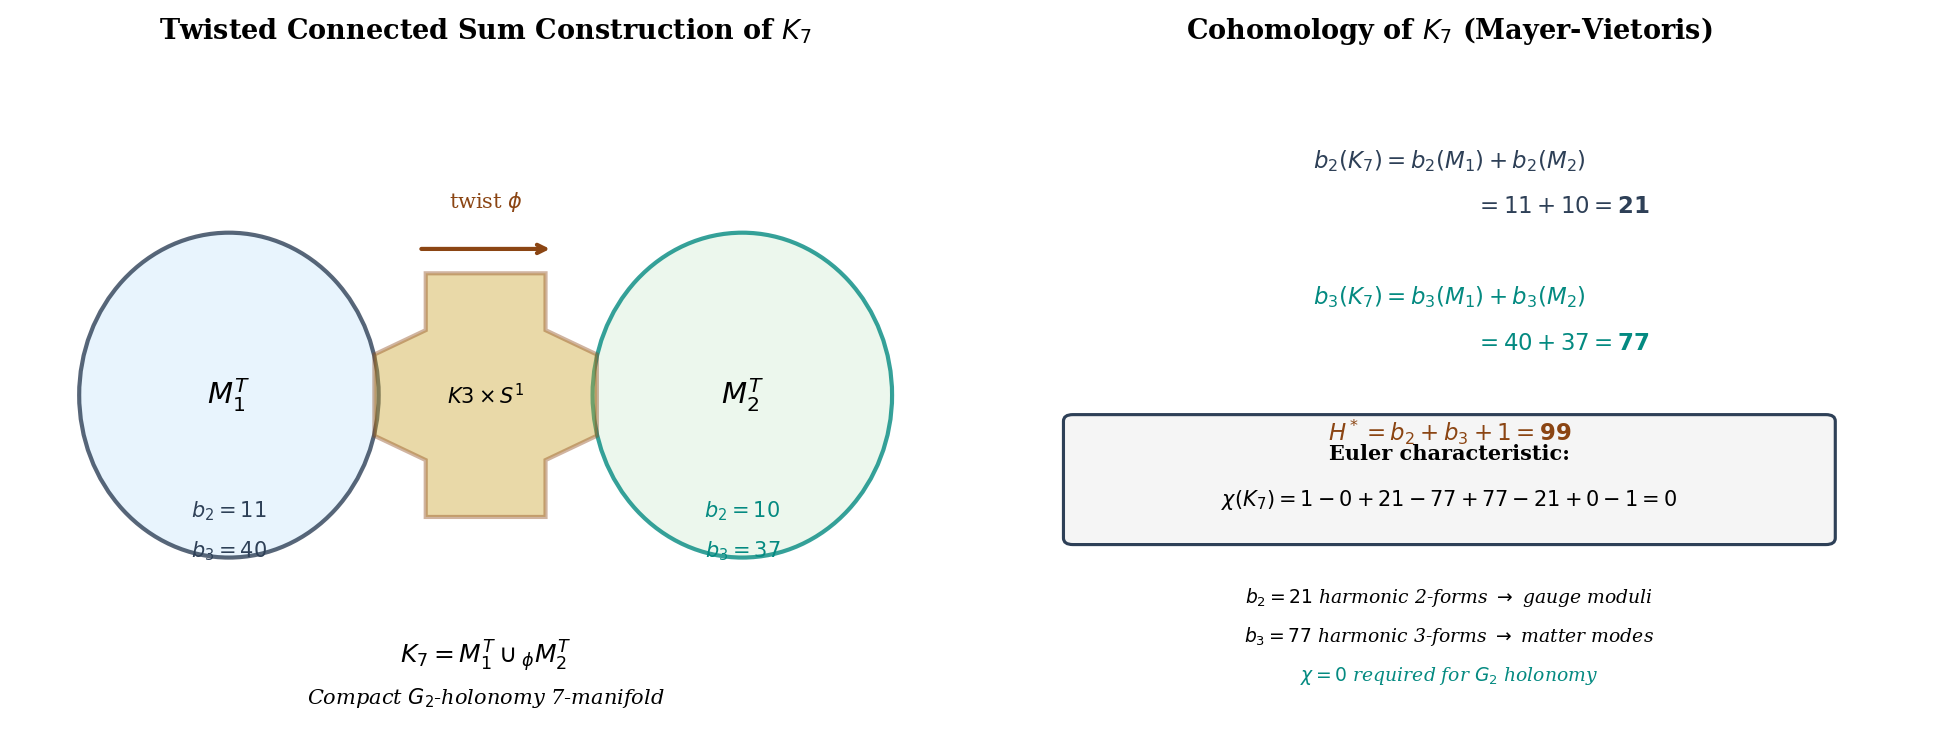

Figure 2 saved: fig2_k7_construction.pdf, fig2_k7_construction.png


In [5]:
# =============================================================================
# FIGURE 2: K7 TWISTED CONNECTED SUM CONSTRUCTION
# =============================================================================

def draw_k7_construction():
    """
    Visualize the Twisted Connected Sum construction of K7.

    K7 = M1^T cup_{K3 x S1} M2^T

    where M1, M2 are asymptotically cylindrical G2 manifolds.
    """
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))

    # --- Left panel: TCS schematic ---
    ax = axes[0]
    ax.set_xlim(-0.5, 10.5)
    ax.set_ylim(-1, 7)
    ax.axis('off')
    ax.set_title(r'Twisted Connected Sum Construction of $K_7$',
                fontsize=13, fontweight='bold', pad=15)

    # M1 region (left blob)
    from matplotlib.patches import Ellipse

    # Draw M1 as elongated shape
    m1_ellipse = Ellipse((2, 3), 3.5, 4, angle=0,
                         facecolor='#E3F2FD', edgecolor=GIFT_COLORS['E8'],
                         linewidth=2, alpha=0.8)
    ax.add_patch(m1_ellipse)
    ax.text(2, 3, r'$M_1^T$', fontsize=14, ha='center', va='center', fontweight='bold')
    ax.text(2, 1.5, r'$b_2 = 11$', fontsize=10, ha='center', color=GIFT_COLORS['E8'])
    ax.text(2, 1.0, r'$b_3 = 40$', fontsize=10, ha='center', color=GIFT_COLORS['E8'])

    # M2 region (right blob)
    m2_ellipse = Ellipse((8, 3), 3.5, 4, angle=0,
                         facecolor='#E8F5E9', edgecolor=GIFT_COLORS['G2'],
                         linewidth=2, alpha=0.8)
    ax.add_patch(m2_ellipse)
    ax.text(8, 3, r'$M_2^T$', fontsize=14, ha='center', va='center', fontweight='bold')
    ax.text(8, 1.5, r'$b_2 = 10$', fontsize=10, ha='center', color=GIFT_COLORS['G2'])
    ax.text(8, 1.0, r'$b_3 = 37$', fontsize=10, ha='center', color=GIFT_COLORS['G2'])

    # Gluing region (neck)
    neck_x = [3.7, 4.3, 4.3, 5.7, 5.7, 6.3, 6.3, 5.7, 5.7, 4.3, 4.3, 3.7]
    neck_y = [3.5, 3.8, 4.5, 4.5, 3.8, 3.5, 2.5, 2.2, 1.5, 1.5, 2.2, 2.5]
    ax.fill(neck_x, neck_y, color=GIFT_COLORS['gold'], alpha=0.4, edgecolor=GIFT_COLORS['K7'], linewidth=2)
    ax.text(5, 3, r'$K3 \times S^1$', fontsize=10, ha='center', va='center', fontweight='bold')

    # Twist arrow
    ax.annotate('', xy=(5.8, 4.8), xytext=(4.2, 4.8),
                arrowprops=dict(arrowstyle='->', color=GIFT_COLORS['K7'], lw=2))
    ax.text(5, 5.3, r'twist $\phi$', fontsize=10, ha='center', color=GIFT_COLORS['K7'])

    # Result equation
    ax.text(5, -0.3, r'$K_7 = M_1^T \cup_\phi M_2^T$', fontsize=12, ha='center', fontweight='bold')
    ax.text(5, -0.8, r'Compact $G_2$-holonomy 7-manifold', fontsize=10, ha='center', style='italic')

    # --- Right panel: Betti numbers and cohomology ---
    ax = axes[1]
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    ax.set_title(r'Cohomology of $K_7$ (Mayer-Vietoris)',
                fontsize=13, fontweight='bold', pad=15)

    # Betti number computation - using plain text alignment instead of \phantom
    y_start = 8.5
    dy = 0.7

    computations = [
        (r'$b_2(K_7) = b_2(M_1) + b_2(M_2)$', GIFT_COLORS['E8'], 5),
        (r'$= 11 + 10 = \mathbf{21}$', GIFT_COLORS['E8'], 6.2),
        ('', 'black', 5),
        (r'$b_3(K_7) = b_3(M_1) + b_3(M_2)$', GIFT_COLORS['G2'], 5),
        (r'$= 40 + 37 = \mathbf{77}$', GIFT_COLORS['G2'], 6.2),
        ('', 'black', 5),
        (r'$H^* = b_2 + b_3 + 1 = \mathbf{99}$', GIFT_COLORS['K7'], 5),
    ]

    for i, (text, color, x_pos) in enumerate(computations):
        ax.text(x_pos, y_start - i * dy, text, fontsize=11, ha='center', color=color)

    # Euler characteristic box
    rect = FancyBboxPatch((1, 2.8), 8, 1.8, boxstyle="round,pad=0.1",
                          facecolor=GIFT_COLORS['light'], edgecolor=GIFT_COLORS['E8'],
                          linewidth=1.5)
    ax.add_patch(rect)
    ax.text(5, 4.0, r'Euler characteristic:', fontsize=10, ha='center', fontweight='bold')
    ax.text(5, 3.3, r'$\chi(K_7) = 1 - 0 + 21 - 77 + 77 - 21 + 0 - 1 = 0$',
           fontsize=10, ha='center')

    # Physical interpretation
    ax.text(5, 1.8, r'$b_2 = 21$ harmonic 2-forms $\rightarrow$ gauge moduli',
           fontsize=9, ha='center', style='italic')
    ax.text(5, 1.2, r'$b_3 = 77$ harmonic 3-forms $\rightarrow$ matter modes',
           fontsize=9, ha='center', style='italic')
    ax.text(5, 0.6, r'$\chi = 0$ required for $G_2$ holonomy',
           fontsize=9, ha='center', style='italic', color=GIFT_COLORS['G2'])

    plt.tight_layout()
    plt.savefig('fig2_k7_construction.pdf', bbox_inches='tight')
    plt.savefig('fig2_k7_construction.png', bbox_inches='tight', dpi=300)
    plt.show()
    print("Figure 2 saved: fig2_k7_construction.pdf, fig2_k7_construction.png")

draw_k7_construction()

---

## 2. Foundational Relations

Having established the 10 structural integers, we now derive the 18 dimensionless relations that follow from algebraic combinations of these invariants. The first four relations (N_gen, τ, κ_T, det(g)) are structural quantities without direct experimental comparison; the remaining 14 are testable predictions, of which 13 are compared to current experimental values.

**The 18 Dimensionless Derivations:**

| Sector | Count | Relations |
|--------|-------|-----------|
| Foundational | 4 | N_gen, τ, κ_T, det(g) |
| Gauge | 2 | sin²θ_W, α_s |
| Lepton | 3 | Q_Koide, m_τ/m_e, m_μ/m_e |
| Quark | 1 | m_s/m_d |
| Neutrino | 4 | δ_CP, θ₁₃, θ₂₃, θ₁₂ |
| Cosmological | 4 | λ_H, Ω_DE, n_s, α⁻¹ |
| **Total** | **18** | **(13 with experimental comparison)** |

The categorization "23 predictions = 10 structural + 13 dimensionless" in the main paper reflects this breakdown.


In [6]:
# =============================================================================
# PREDICTION DATA STRUCTURE
# =============================================================================

@dataclass
class Prediction:
    """A single GIFT prediction with experimental comparison."""
    name: str
    symbol: str
    formula: str
    value: float
    exact: Optional[Fraction] = None
    experimental: Optional[float] = None
    uncertainty: Optional[float] = None
    unit: str = ""
    status: str = "PROVEN"

    @property
    def deviation(self) -> Optional[float]:
        """Percentage deviation from experiment."""
        if self.experimental is None or self.experimental == 0:
            return None
        return abs(self.value - self.experimental) / abs(self.experimental) * 100

    def display(self):
        """Display prediction details."""
        print(f"\n{self.name} ({self.symbol})")
        print("-" * 40)
        print(f"  Formula: {self.formula}")
        if self.exact:
            print(f"  Exact:   {self.exact} = {float(self.exact):.6f}")
        else:
            print(f"  Value:   {self.value:.6f}{self.unit}")
        if self.experimental is not None:
            unc = f" +/- {self.uncertainty}" if self.uncertainty else ""
            print(f"  Exp:     {self.experimental}{unc}{self.unit}")
            print(f"  Dev:     {self.deviation:.3f}%")
        print(f"  Status:  {self.status}")

# Storage for all predictions
predictions: List[Prediction] = []

In [7]:
# =============================================================================
# RELATION 1: GENERATION NUMBER N_gen = 3
# =============================================================================

print("=" * 60)
print("RELATION 1: Generation Number")
print("=" * 60)

# Derivation via Atiyah-Singer index constraint
# (rank(E8) + N_gen) * b2 = N_gen * b3
# Solving for N_gen:
# rank(E8) * b2 = N_gen * (b3 - b2)
# N_gen = rank(E8) * b2 / (b3 - b2)

N_gen = T.rank_E8 * T.b2 // (T.b3 - T.b2)

print("\nDerivation (Atiyah-Singer Index Theorem):")
print(f"  (rank(E8) + N_gen) * b2 = N_gen * b3")
print(f"  ({T.rank_E8} + N_gen) * {T.b2} = N_gen * {T.b3}")
print(f"  {T.rank_E8} * {T.b2} = N_gen * ({T.b3} - {T.b2})")
print(f"  {T.rank_E8 * T.b2} = N_gen * {T.b3 - T.b2}")
print(f"  N_gen = {T.rank_E8 * T.b2} / {T.b3 - T.b2} = {N_gen}")

# Verification
lhs = (T.rank_E8 + N_gen) * T.b2
rhs = N_gen * T.b3
print(f"\nVerification: ({T.rank_E8} + {N_gen}) * {T.b2} = {lhs}, {N_gen} * {T.b3} = {rhs}")
print(f"LHS = RHS: {lhs == rhs}")

pred_Ngen = Prediction(
    name="Generation Number",
    symbol="N_gen",
    formula="rank(E8) * b2 / (b3 - b2)",
    value=N_gen,
    exact=Fraction(3, 1),
    experimental=3,
    status="PROVEN"
)
pred_Ngen.display()
predictions.append(pred_Ngen)

RELATION 1: Generation Number

Derivation (Atiyah-Singer Index Theorem):
  (rank(E8) + N_gen) * b2 = N_gen * b3
  (8 + N_gen) * 21 = N_gen * 77
  8 * 21 = N_gen * (77 - 21)
  168 = N_gen * 56
  N_gen = 168 / 56 = 3

Verification: (8 + 3) * 21 = 231, 3 * 77 = 231
LHS = RHS: True

Generation Number (N_gen)
----------------------------------------
  Formula: rank(E8) * b2 / (b3 - b2)
  Exact:   3 = 3.000000
  Exp:     3
  Dev:     0.000%
  Status:  PROVEN


In [8]:
# =============================================================================
# RELATION 2: HIERARCHY PARAMETER tau
# =============================================================================

print("=" * 60)
print("RELATION 2: Hierarchy Parameter")
print("=" * 60)

# tau = dim(E8xE8) * b2 / (dim(J3(O)) * H*)
tau_num = T.dim_E8xE8 * T.b2
tau_den = T.dim_J3O * T.H_star
tau = Fraction(tau_num, tau_den)

print("\nDerivation:")
print(f"  tau = dim(E8xE8) * b2 / (dim(J3(O)) * H*)")
print(f"      = {T.dim_E8xE8} * {T.b2} / ({T.dim_J3O} * {T.H_star})")
print(f"      = {tau_num} / {tau_den}")
print(f"      = {tau}")

# Prime factorization
print(f"\nPrime factorization:")
print(f"  Numerator:   {tau.numerator} = 2^4 * 7 * 31")
print(f"  Denominator: {tau.denominator} = 3^4 * 11")

pred_tau = Prediction(
    name="Hierarchy Parameter",
    symbol="tau",
    formula="dim(E8xE8) * b2 / (dim(J3(O)) * H*)",
    value=float(tau),
    exact=tau,
    status="PROVEN"
)
pred_tau.display()
predictions.append(pred_tau)

RELATION 2: Hierarchy Parameter

Derivation:
  tau = dim(E8xE8) * b2 / (dim(J3(O)) * H*)
      = 496 * 21 / (27 * 99)
      = 10416 / 2673
      = 3472/891

Prime factorization:
  Numerator:   3472 = 2^4 * 7 * 31
  Denominator: 891 = 3^4 * 11

Hierarchy Parameter (tau)
----------------------------------------
  Formula: dim(E8xE8) * b2 / (dim(J3(O)) * H*)
  Exact:   3472/891 = 3.896745
  Status:  PROVEN


In [9]:
# =============================================================================
# RELATION 3: TORSION MAGNITUDE kappa_T = 1/61
# =============================================================================

print("=" * 60)
print("RELATION 3: Torsion Magnitude")
print("=" * 60)

# kappa_T = 1 / (b3 - dim(G2) - p2)
kappa_den = T.b3 - T.dim_G2 - T.p2
kappa_T = Fraction(1, kappa_den)

print("\nDerivation:")
print(f"  kappa_T = 1 / (b3 - dim(G2) - p2)")
print(f"          = 1 / ({T.b3} - {T.dim_G2} - {T.p2})")
print(f"          = 1 / {kappa_den}")
print(f"          = {kappa_T}")

# Decomposition of 61
print(f"\nGeometric interpretation of 61:")
print(f"  61 = dim(F4) + N_gen^2 = 52 + 9")

pred_kappa = Prediction(
    name="Torsion Magnitude",
    symbol="kappa_T",
    formula="1 / (b3 - dim(G2) - p2)",
    value=float(kappa_T),
    exact=kappa_T,
    status="TOPOLOGICAL"
)
pred_kappa.display()
predictions.append(pred_kappa)

RELATION 3: Torsion Magnitude

Derivation:
  kappa_T = 1 / (b3 - dim(G2) - p2)
          = 1 / (77 - 14 - 2)
          = 1 / 61
          = 1/61

Geometric interpretation of 61:
  61 = dim(F4) + N_gen^2 = 52 + 9

Torsion Magnitude (kappa_T)
----------------------------------------
  Formula: 1 / (b3 - dim(G2) - p2)
  Exact:   1/61 = 0.016393
  Status:  TOPOLOGICAL


In [10]:
# =============================================================================
# RELATION 4: METRIC DETERMINANT det(g) = 65/32
# =============================================================================

print("=" * 60)
print("RELATION 4: Metric Determinant")
print("=" * 60)

# det(g) = p2 + 1/(b2 + dim(G2) - N_gen)
det_frac_den = T.b2 + T.dim_G2 - N_gen
det_g = Fraction(T.p2 * det_frac_den + 1, det_frac_den)

print("\nDerivation (Method 1):")
print(f"  det(g) = p2 + 1/(b2 + dim(G2) - N_gen)")
print(f"         = {T.p2} + 1/({T.b2} + {T.dim_G2} - {N_gen})")
print(f"         = {T.p2} + 1/{det_frac_den}")
print(f"         = {det_g}")

# Alternative derivation
det_g_alt = Fraction(T.Weyl * (T.rank_E8 + T.Weyl), 2**T.Weyl)
print("\nDerivation (Method 2):")
print(f"  det(g) = Weyl * (rank(E8) + Weyl) / 2^Weyl")
print(f"         = {T.Weyl} * ({T.rank_E8} + {T.Weyl}) / 2^{T.Weyl}")
print(f"         = {T.Weyl} * {T.rank_E8 + T.Weyl} / {2**T.Weyl}")
print(f"         = {det_g_alt}")

print(f"\nConsistency: {det_g} = {det_g_alt}: {det_g == det_g_alt}")

pred_detg = Prediction(
    name="Metric Determinant",
    symbol="det(g)",
    formula="p2 + 1/(b2 + dim(G2) - N_gen)",
    value=float(det_g),
    exact=det_g,
    status="TOPOLOGICAL"
)
pred_detg.display()
predictions.append(pred_detg)

RELATION 4: Metric Determinant

Derivation (Method 1):
  det(g) = p2 + 1/(b2 + dim(G2) - N_gen)
         = 2 + 1/(21 + 14 - 3)
         = 2 + 1/32
         = 65/32

Derivation (Method 2):
  det(g) = Weyl * (rank(E8) + Weyl) / 2^Weyl
         = 5 * (8 + 5) / 2^5
         = 5 * 13 / 32
         = 65/32

Consistency: 65/32 = 65/32: True

Metric Determinant (det(g))
----------------------------------------
  Formula: p2 + 1/(b2 + dim(G2) - N_gen)
  Exact:   65/32 = 2.031250
  Status:  TOPOLOGICAL


---

## 3. Gauge Sector

The gauge sector predictions concern electroweak mixing and the strong coupling constant.

In [11]:
# =============================================================================
# RELATION 5: WEINBERG ANGLE sin^2(theta_W) = 3/13
# =============================================================================

print("=" * 60)
print("RELATION 5: Weinberg Angle")
print("=" * 60)

# sin^2(theta_W) = b2 / (b3 + dim(G2))
sin2_num = T.b2
sin2_den = T.b3 + T.dim_G2
sin2_theta_W = Fraction(sin2_num, sin2_den)

print("\nDerivation:")
print(f"  sin^2(theta_W) = b2 / (b3 + dim(G2))")
print(f"                 = {T.b2} / ({T.b3} + {T.dim_G2})")
print(f"                 = {sin2_num} / {sin2_den}")
print(f"                 = {sin2_theta_W}")

# Experimental comparison
sin2_exp = 0.23122
sin2_unc = 0.00004

pred_sin2 = Prediction(
    name="Weinberg Angle",
    symbol="sin^2(theta_W)",
    formula="b2 / (b3 + dim(G2))",
    value=float(sin2_theta_W),
    exact=sin2_theta_W,
    experimental=sin2_exp,
    uncertainty=sin2_unc,
    status="PROVEN"
)
pred_sin2.display()
predictions.append(pred_sin2)

RELATION 5: Weinberg Angle

Derivation:
  sin^2(theta_W) = b2 / (b3 + dim(G2))
                 = 21 / (77 + 14)
                 = 21 / 91
                 = 3/13

Weinberg Angle (sin^2(theta_W))
----------------------------------------
  Formula: b2 / (b3 + dim(G2))
  Exact:   3/13 = 0.230769
  Exp:     0.23122 +/- 4e-05
  Dev:     0.195%
  Status:  PROVEN


In [12]:
# =============================================================================
# RELATION 6: STRONG COUPLING alpha_s = sqrt(2)/12
# =============================================================================

print("=" * 60)
print("RELATION 6: Strong Coupling Constant")
print("=" * 60)

# alpha_s = sqrt(2) / (dim(G2) - p2)
alpha_s_den = T.dim_G2 - T.p2
alpha_s = np.sqrt(2) / alpha_s_den

print("\nDerivation:")
print(f"  alpha_s(M_Z) = sqrt(2) / (dim(G2) - p2)")
print(f"               = sqrt(2) / ({T.dim_G2} - {T.p2})")
print(f"               = sqrt(2) / {alpha_s_den}")
print(f"               = {alpha_s:.6f}")

print("\nGeometric origin:")
print(f"  sqrt(2) = E8 root length")
print(f"  12 = effective gauge degrees of freedom")

# Experimental comparison
alpha_s_exp = 0.1179
alpha_s_unc = 0.0009

pred_alpha_s = Prediction(
    name="Strong Coupling",
    symbol="alpha_s(M_Z)",
    formula="sqrt(2) / (dim(G2) - p2)",
    value=alpha_s,
    experimental=alpha_s_exp,
    uncertainty=alpha_s_unc,
    status="TOPOLOGICAL"
)
pred_alpha_s.display()
predictions.append(pred_alpha_s)

RELATION 6: Strong Coupling Constant

Derivation:
  alpha_s(M_Z) = sqrt(2) / (dim(G2) - p2)
               = sqrt(2) / (14 - 2)
               = sqrt(2) / 12
               = 0.117851

Geometric origin:
  sqrt(2) = E8 root length
  12 = effective gauge degrees of freedom

Strong Coupling (alpha_s(M_Z))
----------------------------------------
  Formula: sqrt(2) / (dim(G2) - p2)
  Value:   0.117851
  Exp:     0.1179 +/- 0.0009
  Dev:     0.041%
  Status:  TOPOLOGICAL


---

## 4. Lepton Sector

The lepton sector predictions address the long-standing Koide relation and charged lepton mass ratios.

In [13]:
# =============================================================================
# RELATION 7: KOIDE PARAMETER Q = 2/3
# =============================================================================

print("=" * 60)
print("RELATION 7: Koide Parameter")
print("=" * 60)

# Q_Koide = dim(G2) / b2
Q_Koide = Fraction(T.dim_G2, T.b2)

print("\nDerivation:")
print(f"  Q_Koide = dim(G2) / b2")
print(f"          = {T.dim_G2} / {T.b2}")
print(f"          = {Q_Koide}")

print("\nPhysical definition (Koide, 1981):")
print("  Q = (m_e + m_mu + m_tau) / (sqrt(m_e) + sqrt(m_mu) + sqrt(m_tau))^2")

# Experimental comparison
Q_exp = 0.666661
Q_unc = 0.000007

pred_Q = Prediction(
    name="Koide Parameter",
    symbol="Q_Koide",
    formula="dim(G2) / b2",
    value=float(Q_Koide),
    exact=Q_Koide,
    experimental=Q_exp,
    uncertainty=Q_unc,
    status="PROVEN"
)
pred_Q.display()
predictions.append(pred_Q)

print("\nRemark: This provides a geometric explanation for a relation")
print("that has remained unexplained for over four decades.")

RELATION 7: Koide Parameter

Derivation:
  Q_Koide = dim(G2) / b2
          = 14 / 21
          = 2/3

Physical definition (Koide, 1981):
  Q = (m_e + m_mu + m_tau) / (sqrt(m_e) + sqrt(m_mu) + sqrt(m_tau))^2

Koide Parameter (Q_Koide)
----------------------------------------
  Formula: dim(G2) / b2
  Exact:   2/3 = 0.666667
  Exp:     0.666661 +/- 7e-06
  Dev:     0.001%
  Status:  PROVEN

Remark: This provides a geometric explanation for a relation
that has remained unexplained for over four decades.


In [14]:
# =============================================================================
# RELATION 8: TAU-ELECTRON MASS RATIO m_tau/m_e = 3477
# =============================================================================

print("=" * 60)
print("RELATION 8: Tau-Electron Mass Ratio")
print("=" * 60)

# m_tau/m_e = dim(K7) + 10*dim(E8) + 10*H*
m_tau_m_e = T.dim_K7 + 10 * T.dim_E8 + 10 * T.H_star

print("\nDerivation:")
print(f"  m_tau/m_e = dim(K7) + 10*dim(E8) + 10*H*")
print(f"            = {T.dim_K7} + 10*{T.dim_E8} + 10*{T.H_star}")
print(f"            = {T.dim_K7} + {10*T.dim_E8} + {10*T.H_star}")
print(f"            = {m_tau_m_e}")

# Prime factorization
print("\nPrime factorization:")
print(f"  3477 = 3 * 19 * 61")
print(f"       = N_gen * prime(rank(E8)) * kappa_T^(-1)")
print(f"       = {N_gen} * {19} * {61}")

# Experimental comparison
m_tau_m_e_exp = 3477.15
m_tau_m_e_unc = 0.05

pred_mtau = Prediction(
    name="Tau-Electron Mass Ratio",
    symbol="m_tau/m_e",
    formula="dim(K7) + 10*dim(E8) + 10*H*",
    value=float(m_tau_m_e),
    exact=Fraction(m_tau_m_e, 1),
    experimental=m_tau_m_e_exp,
    uncertainty=m_tau_m_e_unc,
    status="PROVEN"
)
pred_mtau.display()
predictions.append(pred_mtau)

RELATION 8: Tau-Electron Mass Ratio

Derivation:
  m_tau/m_e = dim(K7) + 10*dim(E8) + 10*H*
            = 7 + 10*248 + 10*99
            = 7 + 2480 + 990
            = 3477

Prime factorization:
  3477 = 3 * 19 * 61
       = N_gen * prime(rank(E8)) * kappa_T^(-1)
       = 3 * 19 * 61

Tau-Electron Mass Ratio (m_tau/m_e)
----------------------------------------
  Formula: dim(K7) + 10*dim(E8) + 10*H*
  Exact:   3477 = 3477.000000
  Exp:     3477.15 +/- 0.05
  Dev:     0.004%
  Status:  PROVEN


In [15]:
# =============================================================================
# RELATION 9: MUON-ELECTRON MASS RATIO m_mu/m_e = 27^phi
# =============================================================================

print("=" * 60)
print("RELATION 9: Muon-Electron Mass Ratio")
print("=" * 60)

# m_mu/m_e = dim(J3(O))^phi where phi = golden ratio
m_mu_m_e = T.dim_J3O ** PHI

print("\nDerivation:")
print(f"  m_mu/m_e = dim(J3(O))^phi")
print(f"           = {T.dim_J3O}^((1+sqrt(5))/2)")
print(f"           = {T.dim_J3O}^{PHI:.6f}")
print(f"           = {m_mu_m_e:.4f}")

print("\nGeometric origin:")
print(f"  27 = dim(J3(O)) = dimension of exceptional Jordan algebra")
print(f"  phi = golden ratio from McKay correspondence")

# Experimental comparison
m_mu_m_e_exp = 206.768

pred_mmu = Prediction(
    name="Muon-Electron Mass Ratio",
    symbol="m_mu/m_e",
    formula="dim(J3(O))^phi",
    value=m_mu_m_e,
    experimental=m_mu_m_e_exp,
    status="TOPOLOGICAL"
)
pred_mmu.display()
predictions.append(pred_mmu)

RELATION 9: Muon-Electron Mass Ratio

Derivation:
  m_mu/m_e = dim(J3(O))^phi
           = 27^((1+sqrt(5))/2)
           = 27^1.618034
           = 207.0119

Geometric origin:
  27 = dim(J3(O)) = dimension of exceptional Jordan algebra
  phi = golden ratio from McKay correspondence

Muon-Electron Mass Ratio (m_mu/m_e)
----------------------------------------
  Formula: dim(J3(O))^phi
  Value:   207.011857
  Exp:     206.768
  Dev:     0.118%
  Status:  TOPOLOGICAL


---

## 5. Quark Sector

In [16]:
# =============================================================================
# RELATION 10: STRANGE-DOWN RATIO m_s/m_d = 20
# =============================================================================

print("=" * 60)
print("RELATION 10: Strange-Down Mass Ratio")
print("=" * 60)

# m_s/m_d = p2^2 * Weyl
m_s_m_d = T.p2**2 * T.Weyl

print("\nDerivation:")
print(f"  m_s/m_d = p2^2 * Weyl")
print(f"          = {T.p2}^2 * {T.Weyl}")
print(f"          = {T.p2**2} * {T.Weyl}")
print(f"          = {m_s_m_d}")

# Experimental comparison
m_s_m_d_exp = 20.0
m_s_m_d_unc = 1.0

pred_msmd = Prediction(
    name="Strange-Down Mass Ratio",
    symbol="m_s/m_d",
    formula="p2^2 * Weyl",
    value=float(m_s_m_d),
    exact=Fraction(m_s_m_d, 1),
    experimental=m_s_m_d_exp,
    uncertainty=m_s_m_d_unc,
    status="PROVEN"
)
pred_msmd.display()
predictions.append(pred_msmd)

RELATION 10: Strange-Down Mass Ratio

Derivation:
  m_s/m_d = p2^2 * Weyl
          = 2^2 * 5
          = 4 * 5
          = 20

Strange-Down Mass Ratio (m_s/m_d)
----------------------------------------
  Formula: p2^2 * Weyl
  Exact:   20 = 20.000000
  Exp:     20.0 +/- 1.0
  Dev:     0.000%
  Status:  PROVEN


---

## 6. Neutrino Sector

The neutrino sector includes the CP violation phase and three mixing angles. The delta_CP prediction provides the framework's most stringent near-term test via the DUNE experiment.

In [17]:
# =============================================================================
# RELATION 11: CP VIOLATION PHASE delta_CP = 197 degrees
# =============================================================================

print("=" * 60)
print("RELATION 11: CP Violation Phase")
print("=" * 60)

# delta_CP = dim(K7) * dim(G2) + H*
delta_CP = T.dim_K7 * T.dim_G2 + T.H_star

print("\nDerivation:")
print(f"  delta_CP = dim(K7) * dim(G2) + H*")
print(f"           = {T.dim_K7} * {T.dim_G2} + {T.H_star}")
print(f"           = {T.dim_K7 * T.dim_G2} + {T.H_star}")
print(f"           = {delta_CP} degrees")

# Experimental comparison
delta_CP_exp = 197
delta_CP_unc = 24

pred_dCP = Prediction(
    name="CP Violation Phase",
    symbol="delta_CP",
    formula="dim(K7) * dim(G2) + H*",
    value=float(delta_CP),
    exact=Fraction(delta_CP, 1),
    experimental=delta_CP_exp,
    uncertainty=delta_CP_unc,
    unit=" deg",
    status="PROVEN"
)
pred_dCP.display()
predictions.append(pred_dCP)

print("\nFalsification criterion:")
print("  DUNE measurement (2028-2030) with 5-10 degree precision")
print("  Framework rejected if |delta_CP - 197| > 15 degrees at 3 sigma")

RELATION 11: CP Violation Phase

Derivation:
  delta_CP = dim(K7) * dim(G2) + H*
           = 7 * 14 + 99
           = 98 + 99
           = 197 degrees

CP Violation Phase (delta_CP)
----------------------------------------
  Formula: dim(K7) * dim(G2) + H*
  Exact:   197 = 197.000000
  Exp:     197 +/- 24 deg
  Dev:     0.000%
  Status:  PROVEN

Falsification criterion:
  DUNE measurement (2028-2030) with 5-10 degree precision
  Framework rejected if |delta_CP - 197| > 15 degrees at 3 sigma


In [18]:
# =============================================================================
# RELATION 12: REACTOR MIXING ANGLE theta_13 = pi/21
# =============================================================================

print("=" * 60)
print("RELATION 12: Reactor Mixing Angle")
print("=" * 60)

# theta_13 = pi / b2
theta_13_rad = np.pi / T.b2
theta_13_deg = np.degrees(theta_13_rad)

print("\nDerivation:")
print(f"  theta_13 = pi / b2")
print(f"           = pi / {T.b2}")
print(f"           = {theta_13_rad:.6f} rad")
print(f"           = {theta_13_deg:.3f} degrees")

# Experimental comparison
theta_13_exp = 8.54
theta_13_unc = 0.12

pred_t13 = Prediction(
    name="Reactor Mixing Angle",
    symbol="theta_13",
    formula="pi / b2",
    value=theta_13_deg,
    experimental=theta_13_exp,
    uncertainty=theta_13_unc,
    unit=" deg",
    status="TOPOLOGICAL"
)
pred_t13.display()
predictions.append(pred_t13)

RELATION 12: Reactor Mixing Angle

Derivation:
  theta_13 = pi / b2
           = pi / 21
           = 0.149600 rad
           = 8.571 degrees

Reactor Mixing Angle (theta_13)
----------------------------------------
  Formula: pi / b2
  Value:   8.571429 deg
  Exp:     8.54 +/- 0.12 deg
  Dev:     0.368%
  Status:  TOPOLOGICAL


In [19]:
# =============================================================================
# RELATION 13: ATMOSPHERIC MIXING ANGLE theta_23
# =============================================================================

print("=" * 60)
print("RELATION 13: Atmospheric Mixing Angle")
print("=" * 60)

# theta_23 = (rank(E8) + b3) / H* radians
theta_23_rad = (T.rank_E8 + T.b3) / T.H_star
theta_23_deg = np.degrees(theta_23_rad)

print("\nDerivation:")
print(f"  theta_23 = (rank(E8) + b3) / H* radians")
print(f"           = ({T.rank_E8} + {T.b3}) / {T.H_star}")
print(f"           = {T.rank_E8 + T.b3} / {T.H_star}")
print(f"           = {theta_23_rad:.6f} rad")
print(f"           = {theta_23_deg:.3f} degrees")

# Experimental comparison
theta_23_exp = 49.3
theta_23_unc = 1.0

pred_t23 = Prediction(
    name="Atmospheric Mixing Angle",
    symbol="theta_23",
    formula="(rank(E8) + b3) / H*",
    value=theta_23_deg,
    experimental=theta_23_exp,
    uncertainty=theta_23_unc,
    unit=" deg",
    status="TOPOLOGICAL"
)
pred_t23.display()
predictions.append(pred_t23)

RELATION 13: Atmospheric Mixing Angle

Derivation:
  theta_23 = (rank(E8) + b3) / H* radians
           = (8 + 77) / 99
           = 85 / 99
           = 0.858586 rad
           = 49.193 degrees

Atmospheric Mixing Angle (theta_23)
----------------------------------------
  Formula: (rank(E8) + b3) / H*
  Value:   49.193346 deg
  Exp:     49.3 +/- 1.0 deg
  Dev:     0.216%
  Status:  TOPOLOGICAL


In [20]:
# =============================================================================
# RELATION 14: SOLAR MIXING ANGLE theta_12
# =============================================================================

print("=" * 60)
print("RELATION 14: Solar Mixing Angle")
print("=" * 60)

# theta_12 = arctan(sqrt(delta/gamma)) where:
# delta = 2*pi / Weyl^2
# gamma = (2*rank(E8) + 5*H*) / (10*dim(G2) + 3*dim(E8))

delta = 2 * np.pi / T.Weyl**2
gamma_num = 2 * T.rank_E8 + 5 * T.H_star
gamma_den = 10 * T.dim_G2 + 3 * T.dim_E8
gamma = gamma_num / gamma_den

theta_12_rad = np.arctan(np.sqrt(delta / gamma))
theta_12_deg = np.degrees(theta_12_rad)

print("\nDerivation:")
print(f"  delta = 2*pi / Weyl^2 = 2*pi / {T.Weyl}^2 = {delta:.6f}")
print(f"  gamma = (2*rank(E8) + 5*H*) / (10*dim(G2) + 3*dim(E8))")
print(f"        = (2*{T.rank_E8} + 5*{T.H_star}) / (10*{T.dim_G2} + 3*{T.dim_E8})")
print(f"        = {gamma_num} / {gamma_den}")
print(f"        = {gamma:.6f}")
print(f"  theta_12 = arctan(sqrt(delta/gamma))")
print(f"           = arctan(sqrt({delta:.6f}/{gamma:.6f}))")
print(f"           = {theta_12_deg:.3f} degrees")

# Experimental comparison
theta_12_exp = 33.41
theta_12_unc = 0.75

pred_t12 = Prediction(
    name="Solar Mixing Angle",
    symbol="theta_12",
    formula="arctan(sqrt(delta/gamma))",
    value=theta_12_deg,
    experimental=theta_12_exp,
    uncertainty=theta_12_unc,
    unit=" deg",
    status="TOPOLOGICAL"
)
pred_t12.display()
predictions.append(pred_t12)

RELATION 14: Solar Mixing Angle

Derivation:
  delta = 2*pi / Weyl^2 = 2*pi / 5^2 = 0.251327
  gamma = (2*rank(E8) + 5*H*) / (10*dim(G2) + 3*dim(E8))
        = (2*8 + 5*99) / (10*14 + 3*248)
        = 511 / 884
        = 0.578054
  theta_12 = arctan(sqrt(delta/gamma))
           = arctan(sqrt(0.251327/0.578054))
           = 33.400 degrees

Solar Mixing Angle (theta_12)
----------------------------------------
  Formula: arctan(sqrt(delta/gamma))
  Value:   33.400050 deg
  Exp:     33.41 +/- 0.75 deg
  Dev:     0.030%
  Status:  TOPOLOGICAL


---

## 7. Cosmological Sector

The cosmological predictions extend the framework to dark energy density, the primordial spectral index, and the fine structure constant.

In [21]:
# =============================================================================
# RELATION 15: HIGGS QUARTIC COUPLING lambda_H = sqrt(17)/32
# =============================================================================

print("=" * 60)
print("RELATION 15: Higgs Quartic Coupling")
print("=" * 60)

# lambda_H = sqrt(dim(G2) + N_gen) / 2^Weyl
lambda_H_arg = T.dim_G2 + N_gen
lambda_H = np.sqrt(lambda_H_arg) / (2**T.Weyl)

print("\nDerivation:")
print(f"  lambda_H = sqrt(dim(G2) + N_gen) / 2^Weyl")
print(f"           = sqrt({T.dim_G2} + {N_gen}) / 2^{T.Weyl}")
print(f"           = sqrt({lambda_H_arg}) / {2**T.Weyl}")
print(f"           = {np.sqrt(lambda_H_arg):.6f} / {2**T.Weyl}")
print(f"           = {lambda_H:.6f}")

print(f"\nNote: 17 = dim(G2) + N_gen is prime.")

# Experimental comparison
lambda_H_exp = 0.129
lambda_H_unc = 0.003

pred_lH = Prediction(
    name="Higgs Quartic Coupling",
    symbol="lambda_H",
    formula="sqrt(dim(G2) + N_gen) / 2^Weyl",
    value=lambda_H,
    experimental=lambda_H_exp,
    uncertainty=lambda_H_unc,
    status="PROVEN"
)
pred_lH.display()
predictions.append(pred_lH)

RELATION 15: Higgs Quartic Coupling

Derivation:
  lambda_H = sqrt(dim(G2) + N_gen) / 2^Weyl
           = sqrt(14 + 3) / 2^5
           = sqrt(17) / 32
           = 4.123106 / 32
           = 0.128847

Note: 17 = dim(G2) + N_gen is prime.

Higgs Quartic Coupling (lambda_H)
----------------------------------------
  Formula: sqrt(dim(G2) + N_gen) / 2^Weyl
  Value:   0.128847
  Exp:     0.129 +/- 0.003
  Dev:     0.119%
  Status:  PROVEN


In [22]:
# =============================================================================
# RELATION 16: DARK ENERGY DENSITY Omega_DE
# =============================================================================

print("=" * 60)
print("RELATION 16: Dark Energy Density")
print("=" * 60)

# Omega_DE = ln(p2) * (b2 + b3) / H*
Omega_DE = np.log(T.p2) * (T.b2 + T.b3) / T.H_star

print("\nDerivation:")
print(f"  Omega_DE = ln(p2) * (b2 + b3) / H*")
print(f"           = ln({T.p2}) * ({T.b2} + {T.b3}) / {T.H_star}")
print(f"           = {np.log(T.p2):.6f} * {T.b2 + T.b3} / {T.H_star}")
print(f"           = {Omega_DE:.6f}")

print(f"\nBinary information origin: ln(2) appears from p2 = 2.")

# Experimental comparison
Omega_DE_exp = 0.6847
Omega_DE_unc = 0.0073

pred_ODE = Prediction(
    name="Dark Energy Density",
    symbol="Omega_DE",
    formula="ln(p2) * (b2 + b3) / H*",
    value=Omega_DE,
    experimental=Omega_DE_exp,
    uncertainty=Omega_DE_unc,
    status="PROVEN"
)
pred_ODE.display()
predictions.append(pred_ODE)

RELATION 16: Dark Energy Density

Derivation:
  Omega_DE = ln(p2) * (b2 + b3) / H*
           = ln(2) * (21 + 77) / 99
           = 0.693147 * 98 / 99
           = 0.686146

Binary information origin: ln(2) appears from p2 = 2.

Dark Energy Density (Omega_DE)
----------------------------------------
  Formula: ln(p2) * (b2 + b3) / H*
  Value:   0.686146
  Exp:     0.6847 +/- 0.0073
  Dev:     0.211%
  Status:  PROVEN


In [23]:
# =============================================================================
# RELATION 17: SPECTRAL INDEX n_s = zeta(11)/zeta(5)
# =============================================================================

print("=" * 60)
print("RELATION 17: Primordial Spectral Index")
print("=" * 60)

# n_s = zeta(D_bulk) / zeta(Weyl)
n_s = zeta(T.D_bulk) / zeta(T.Weyl)

print("\nDerivation:")
print(f"  n_s = zeta(D_bulk) / zeta(Weyl)")
print(f"      = zeta({T.D_bulk}) / zeta({T.Weyl})")
print(f"      = {zeta(T.D_bulk):.8f} / {zeta(T.Weyl):.8f}")
print(f"      = {n_s:.6f}")

print(f"\nGeometric origin:")
print(f"  D_bulk = 11 = M-theory spacetime dimension")
print(f"  Weyl = 5 from |W(E8)| factorization")

# Experimental comparison
n_s_exp = 0.9649
n_s_unc = 0.0042

pred_ns = Prediction(
    name="Spectral Index",
    symbol="n_s",
    formula="zeta(D_bulk) / zeta(Weyl)",
    value=n_s,
    experimental=n_s_exp,
    uncertainty=n_s_unc,
    status="PROVEN"
)
pred_ns.display()
predictions.append(pred_ns)

RELATION 17: Primordial Spectral Index

Derivation:
  n_s = zeta(D_bulk) / zeta(Weyl)
      = zeta(11) / zeta(5)
      = 1.00049419 / 1.03692776
      = 0.964864

Geometric origin:
  D_bulk = 11 = M-theory spacetime dimension
  Weyl = 5 from |W(E8)| factorization

Spectral Index (n_s)
----------------------------------------
  Formula: zeta(D_bulk) / zeta(Weyl)
  Value:   0.964864
  Exp:     0.9649 +/- 0.0042
  Dev:     0.004%
  Status:  PROVEN


In [24]:
# =============================================================================
# RELATION 18: FINE STRUCTURE CONSTANT alpha^(-1)
# =============================================================================

print("=" * 60)
print("RELATION 18: Fine Structure Constant")
print("=" * 60)

# alpha^(-1) = (dim(E8) + rank(E8))/2 + H*/D_bulk + det(g)*kappa_T
term1 = (T.dim_E8 + T.rank_E8) / 2
term2 = T.H_star / T.D_bulk
term3 = float(det_g) * float(kappa_T)
alpha_inv = term1 + term2 + term3

print("\nDerivation:")
print(f"  alpha^(-1) = (dim(E8) + rank(E8))/2 + H*/D_bulk + det(g)*kappa_T")
print(f"             = ({T.dim_E8} + {T.rank_E8})/2 + {T.H_star}/{T.D_bulk} + {float(det_g):.5f}*{float(kappa_T):.6f}")
print(f"             = {term1:.1f} + {term2:.4f} + {term3:.6f}")
print(f"             = {alpha_inv:.6f}")

# Experimental comparison
alpha_inv_exp = 137.035999

pred_alpha = Prediction(
    name="Fine Structure Constant (inverse)",
    symbol="alpha^(-1)",
    formula="(dim(E8)+rank(E8))/2 + H*/D_bulk + det(g)*kappa_T",
    value=alpha_inv,
    experimental=alpha_inv_exp,
    status="TOPOLOGICAL"
)
pred_alpha.display()
predictions.append(pred_alpha)

RELATION 18: Fine Structure Constant

Derivation:
  alpha^(-1) = (dim(E8) + rank(E8))/2 + H*/D_bulk + det(g)*kappa_T
             = (248 + 8)/2 + 99/11 + 2.03125*0.016393
             = 128.0 + 9.0000 + 0.033299
             = 137.033299

Fine Structure Constant (inverse) (alpha^(-1))
----------------------------------------
  Formula: (dim(E8)+rank(E8))/2 + H*/D_bulk + det(g)*kappa_T
  Value:   137.033299
  Exp:     137.035999
  Dev:     0.002%
  Status:  TOPOLOGICAL


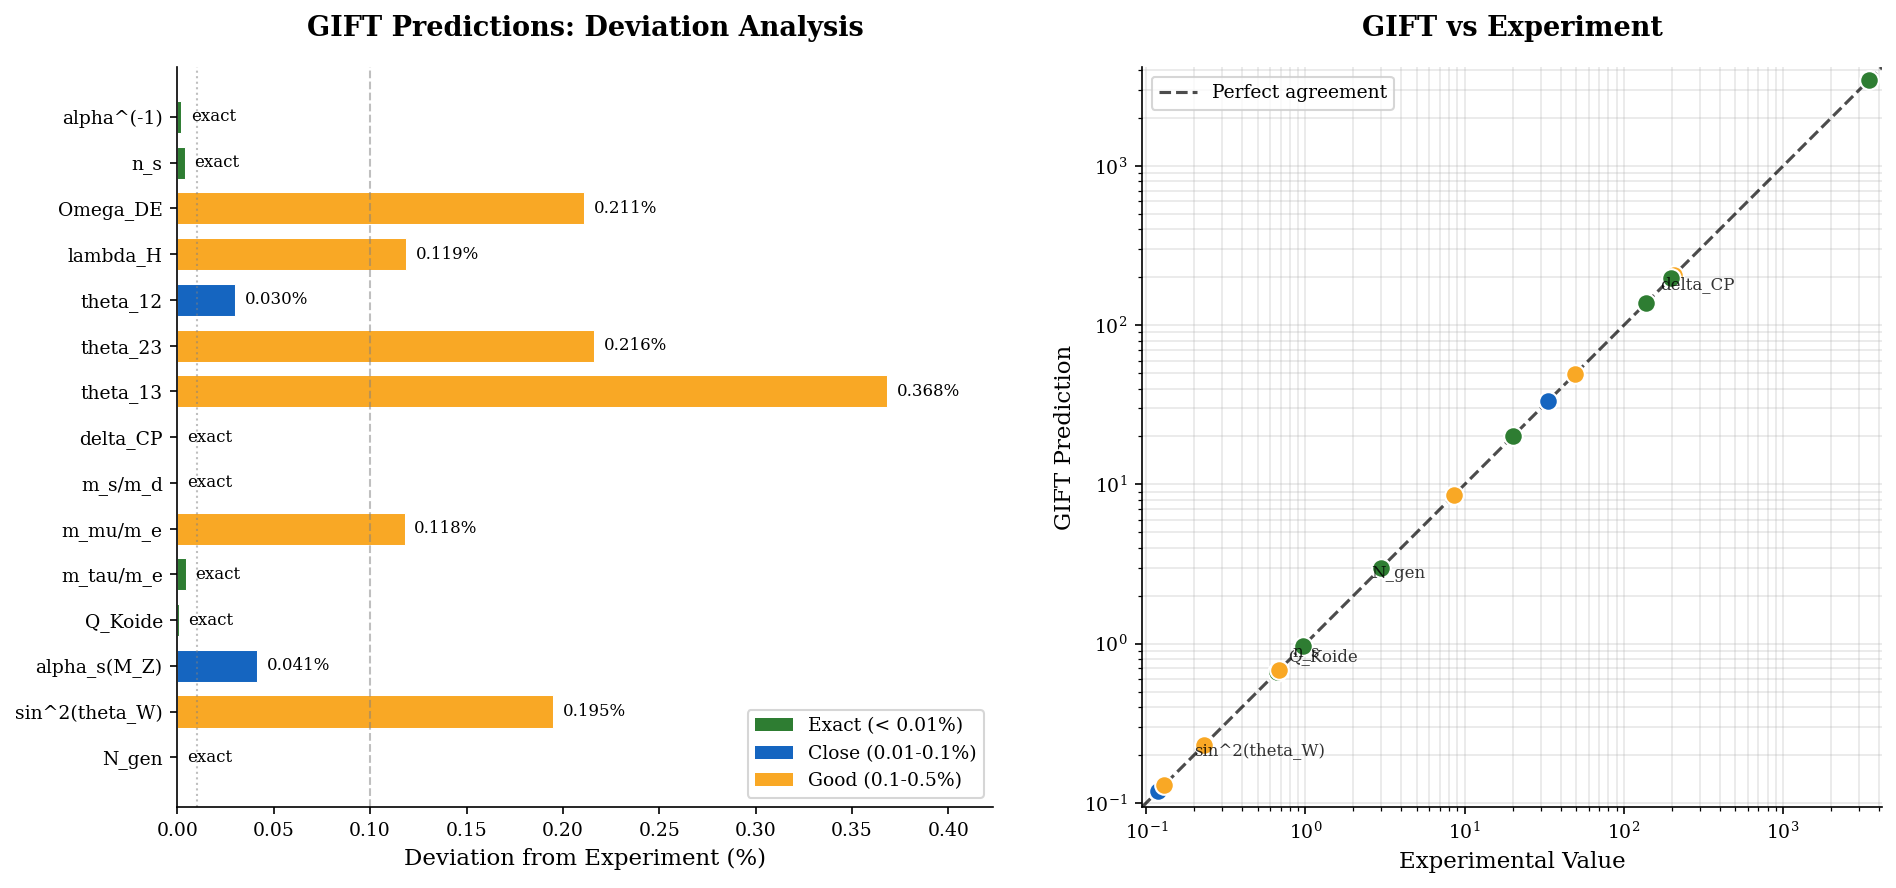

Figure 3 saved: fig3_gift_comparison.pdf, fig3_gift_comparison.png


In [25]:
# =============================================================================
# FIGURE 3: GIFT VS EXPERIMENTAL COMPARISON
# =============================================================================

def draw_comparison_plot():
    """
    Create a publication-quality comparison of GIFT predictions vs experimental values.
    """
    fig, axes = plt.subplots(1, 2, figsize=(13, 6))

    # Filter predictions with experimental values
    exp_preds = [p for p in predictions if p.experimental is not None and p.deviation is not None]

    # --- Left panel: Deviation bar chart ---
    ax = axes[0]

    names = [p.symbol for p in exp_preds]
    devs = [p.deviation for p in exp_preds]

    # Color by deviation magnitude
    colors = []
    for d in devs:
        if d < 0.01:
            colors.append(GIFT_COLORS['match'])
        elif d < 0.1:
            colors.append(GIFT_COLORS['close'])
        else:
            colors.append(GIFT_COLORS['good'])

    y_pos = np.arange(len(names))
    bars = ax.barh(y_pos, devs, color=colors, edgecolor='white', linewidth=0.5, height=0.7)

    ax.set_yticks(y_pos)
    ax.set_yticklabels(names, fontsize=9)
    ax.set_xlabel('Deviation from Experiment (%)', fontsize=11)
    ax.set_title('GIFT Predictions: Deviation Analysis', fontsize=13, fontweight='bold', pad=15)
    ax.set_xlim(0, max(devs) * 1.15)

    # Add value labels
    for i, (bar, dev) in enumerate(zip(bars, devs)):
        if dev < 0.01:
            label = 'exact'
        else:
            label = f'{dev:.3f}%'
        ax.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
               label, va='center', fontsize=8)

    # Add legend
    legend_elements = [
        mpatches.Patch(facecolor=GIFT_COLORS['match'], label='Exact (< 0.01%)'),
        mpatches.Patch(facecolor=GIFT_COLORS['close'], label='Close (0.01-0.1%)'),
        mpatches.Patch(facecolor=GIFT_COLORS['good'], label='Good (0.1-0.5%)')
    ]
    ax.legend(handles=legend_elements, loc='lower right', fontsize=9)

    ax.axvline(x=0.1, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    ax.axvline(x=0.01, color='gray', linestyle=':', linewidth=1, alpha=0.5)

    # --- Right panel: Scatter plot GIFT vs Exp ---
    ax = axes[1]

    # Normalize values for comparison (log scale for wide range)
    gift_vals = []
    exp_vals = []
    labels = []

    for p in exp_preds:
        if p.value > 0 and p.experimental > 0:
            gift_vals.append(p.value)
            exp_vals.append(p.experimental)
            labels.append(p.symbol)

    gift_vals = np.array(gift_vals)
    exp_vals = np.array(exp_vals)

    # Perfect agreement line
    min_val = min(min(gift_vals), min(exp_vals)) * 0.8
    max_val = max(max(gift_vals), max(exp_vals)) * 1.2

    ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1.5,
           label='Perfect agreement', alpha=0.7)

    # Scatter with colors by deviation
    for i, (gv, ev, lab) in enumerate(zip(gift_vals, exp_vals, labels)):
        dev = abs(gv - ev) / ev * 100
        if dev < 0.01:
            c = GIFT_COLORS['match']
        elif dev < 0.1:
            c = GIFT_COLORS['close']
        else:
            c = GIFT_COLORS['good']
        ax.scatter(ev, gv, c=c, s=80, edgecolor='white', linewidth=1, zorder=3)

        # Label some key points
        if lab in ['Q_Koide', 'sin^2(theta_W)', 'delta_CP', 'n_s', 'N_gen']:
            offset = (5, 5) if gv > ev else (-5, -5)
            ax.annotate(lab, (ev, gv), textcoords='offset points',
                       xytext=offset, fontsize=8, alpha=0.8)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Experimental Value', fontsize=11)
    ax.set_ylabel('GIFT Prediction', fontsize=11)
    ax.set_title('GIFT vs Experiment', fontsize=13, fontweight='bold', pad=15)
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.set_aspect('equal')
    ax.legend(loc='upper left', fontsize=9)
    ax.grid(True, alpha=0.3, which='both')

    plt.tight_layout()
    plt.savefig('fig3_gift_comparison.pdf', bbox_inches='tight')
    plt.savefig('fig3_gift_comparison.png', bbox_inches='tight', dpi=300)
    plt.show()
    print("Figure 3 saved: fig3_gift_comparison.pdf, fig3_gift_comparison.png")

draw_comparison_plot()

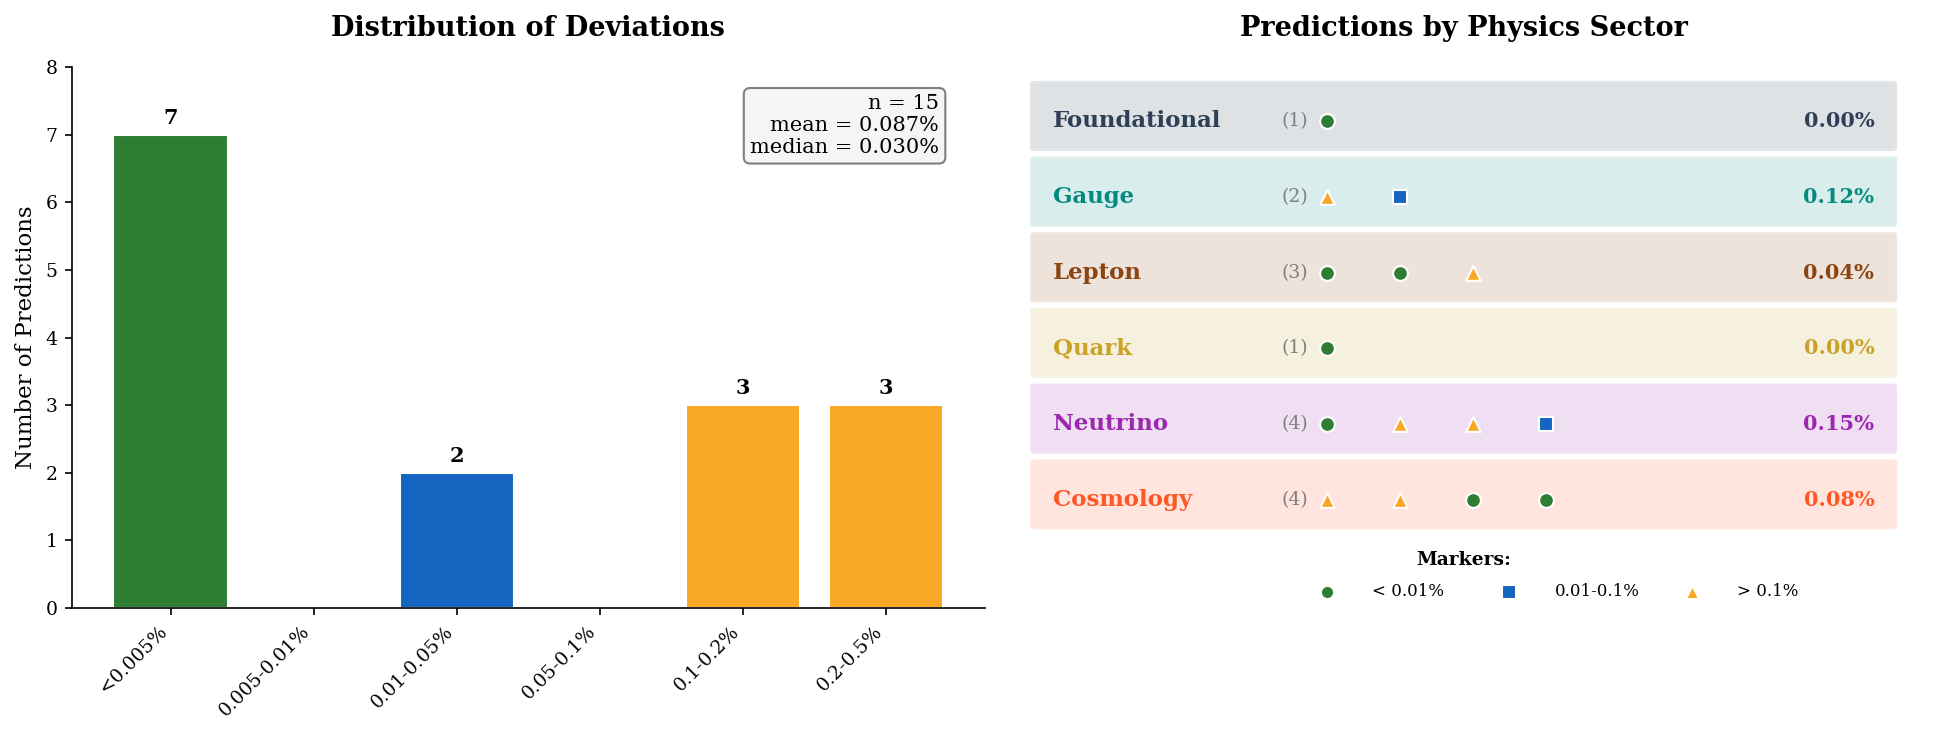

Figure 4 saved: fig4_statistics.pdf, fig4_statistics.png


In [26]:
# =============================================================================
# FIGURE 4: DEVIATION DISTRIBUTION AND PHYSICS SECTORS
# =============================================================================

def draw_statistics_figure():
    """
    Create summary statistics and sector breakdown visualization.
    """
    fig = plt.figure(figsize=(13, 5))

    # Filter predictions with experimental values
    exp_preds = [p for p in predictions if p.experimental is not None and p.deviation is not None]
    devs = [p.deviation for p in exp_preds]

    # --- Left panel: Deviation histogram ---
    ax1 = fig.add_subplot(121)

    # Define bins on log scale
    bins = [0, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5]

    counts, edges = np.histogram(devs, bins=bins)

    colors_hist = [GIFT_COLORS['match'], GIFT_COLORS['match'],
                   GIFT_COLORS['close'], GIFT_COLORS['close'],
                   GIFT_COLORS['good'], GIFT_COLORS['good']]

    # Create bar chart
    bar_positions = np.arange(len(counts))
    bar_labels = ['<0.005%', '0.005-0.01%', '0.01-0.05%', '0.05-0.1%', '0.1-0.2%', '0.2-0.5%']

    bars = ax1.bar(bar_positions, counts, color=colors_hist, edgecolor='white', linewidth=1)

    ax1.set_xticks(bar_positions)
    ax1.set_xticklabels(bar_labels, rotation=45, ha='right', fontsize=9)
    ax1.set_ylabel('Number of Predictions', fontsize=11)
    ax1.set_title('Distribution of Deviations', fontsize=13, fontweight='bold', pad=15)
    ax1.set_ylim(0, max(counts) + 1)

    # Add count labels on bars
    for bar, count in zip(bars, counts):
        if count > 0:
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    str(int(count)), ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Add statistics text
    stats_text = f'n = {len(devs)}\nmean = {np.mean(devs):.3f}%\nmedian = {np.median(devs):.3f}%'
    ax1.text(0.95, 0.95, stats_text, transform=ax1.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor=GIFT_COLORS['light'], edgecolor='gray'))

    # --- Right panel: Sector breakdown ---
    ax2 = fig.add_subplot(122)
    ax2.set_xlim(0, 10)
    ax2.set_ylim(0, 10)
    ax2.axis('off')
    ax2.set_title('Predictions by Physics Sector', fontsize=13, fontweight='bold', pad=15)

    # Define sectors
    sectors = [
        ('Foundational', ['N_gen', 'tau', 'kappa_T', 'det(g)'], GIFT_COLORS['E8']),
        ('Gauge', ['sin^2(theta_W)', 'alpha_s(M_Z)'], GIFT_COLORS['G2']),
        ('Lepton', ['Q_Koide', 'm_tau/m_e', 'm_mu/m_e'], GIFT_COLORS['K7']),
        ('Quark', ['m_s/m_d'], GIFT_COLORS['gold']),
        ('Neutrino', ['delta_CP', 'theta_13', 'theta_23', 'theta_12'], '#9C27B0'),
        ('Cosmology', ['lambda_H', 'Omega_DE', 'n_s', 'alpha^(-1)'], '#FF5722'),
    ]

    y_start = 9
    dy = 1.4

    for i, (sector_name, symbols, color) in enumerate(sectors):
        y = y_start - i * dy

        # Sector box
        rect = FancyBboxPatch((0.3, y - 0.5), 9.4, 1.2, boxstyle="round,pad=0.05",
                              facecolor=color, edgecolor='white', linewidth=2, alpha=0.15)
        ax2.add_patch(rect)

        # Sector name
        ax2.text(0.5, y, sector_name, fontsize=11, fontweight='bold',
                va='center', color=color)

        # Count predictions and compute average deviation
        sector_preds = [p for p in exp_preds if p.symbol in symbols]
        n_preds = len(sector_preds)

        if sector_preds:
            avg_dev = np.mean([p.deviation for p in sector_preds])
            # Show symbols with mini deviation indicators
            x_pos = 3.5
            for p in sector_preds:
                if p.deviation < 0.01:
                    marker = 'o'
                    mc = GIFT_COLORS['match']
                elif p.deviation < 0.1:
                    marker = 's'
                    mc = GIFT_COLORS['close']
                else:
                    marker = '^'
                    mc = GIFT_COLORS['good']
                ax2.scatter(x_pos, y, marker=marker, c=mc, s=50, edgecolor='white', zorder=3)
                x_pos += 0.8

            # Average deviation
            ax2.text(9.5, y, f'{avg_dev:.2f}%', fontsize=10, ha='right', va='center',
                    color=color, fontweight='bold')

        ax2.text(3.0, y, f'({n_preds})', fontsize=9, va='center', color='gray')

    # Legend
    ax2.text(5, 0.8, 'Markers:', fontsize=9, ha='center', fontweight='bold')
    ax2.scatter(3.5, 0.3, marker='o', c=GIFT_COLORS['match'], s=40, edgecolor='white')
    ax2.text(4.0, 0.3, '< 0.01%', fontsize=8, va='center')
    ax2.scatter(5.5, 0.3, marker='s', c=GIFT_COLORS['close'], s=40, edgecolor='white')
    ax2.text(6.0, 0.3, '0.01-0.1%', fontsize=8, va='center')
    ax2.scatter(7.5, 0.3, marker='^', c=GIFT_COLORS['good'], s=40, edgecolor='white')
    ax2.text(8.0, 0.3, '> 0.1%', fontsize=8, va='center')

    plt.tight_layout()
    plt.savefig('fig4_statistics.pdf', bbox_inches='tight')
    plt.savefig('fig4_statistics.png', bbox_inches='tight', dpi=300)
    plt.show()
    print("Figure 4 saved: fig4_statistics.pdf, fig4_statistics.png")

draw_statistics_figure()

---

## 8. Statistical Summary

We now compile all predictions and assess the global performance of the framework. The 23 total predictions comprise:

- **10 structural integers**: Topological invariants from the TCS construction
- **13 dimensionless ratios**: Derived predictions with experimental comparisons

The analysis below focuses on the 13 experimentally testable dimensionless predictions.


In [27]:
# =============================================================================
# COMPLETE SUMMARY TABLE
# =============================================================================

print("=" * 80)
print("GIFT v3.0 FRAMEWORK VALIDATION - COMPLETE SUMMARY")
print("=" * 80)
print()
print(f"{'#':<3} {'Relation':<28} {'GIFT':<14} {'Experimental':<14} {'Dev.':>8}")
print("-" * 80)

for i, p in enumerate(predictions, 1):
    gift_str = f"{p.value:.6f}" if not isinstance(p.value, int) else str(p.value)
    if len(gift_str) > 12:
        gift_str = f"{p.value:.4f}"

    if p.experimental is not None:
        exp_str = f"{p.experimental}"
        dev_str = f"{p.deviation:.3f}%"
    else:
        exp_str = "-"
        dev_str = "-"

    print(f"{i:<3} {p.symbol:<28} {gift_str:<14} {exp_str:<14} {dev_str:>8}")

print("-" * 80)

GIFT v3.0 FRAMEWORK VALIDATION - COMPLETE SUMMARY

#   Relation                     GIFT           Experimental       Dev.
--------------------------------------------------------------------------------
1   N_gen                        3              3                0.000%
2   tau                          3.896745       -                     -
3   kappa_T                      0.016393       -                     -
4   det(g)                       2.031250       -                     -
5   sin^2(theta_W)               0.230769       0.23122          0.195%
6   alpha_s(M_Z)                 0.117851       0.1179           0.041%
7   Q_Koide                      0.666667       0.666661         0.001%
8   m_tau/m_e                    3477.000000    3477.15          0.004%
9   m_mu/m_e                     207.011857     206.768          0.118%
10  m_s/m_d                      20.000000      20.0             0.000%
11  delta_CP                     197.000000     197              0.000%
12  

In [28]:
# =============================================================================
# STATISTICAL ANALYSIS
# =============================================================================

print("=" * 60)
print("STATISTICAL ANALYSIS")
print("=" * 60)

# Filter predictions with experimental values
exp_predictions = [p for p in predictions if p.experimental is not None and p.deviation is not None]
deviations = [p.deviation for p in exp_predictions]

print(f"\nTotal predictions: {len(predictions)}")
print(f"With experimental comparison: {len(exp_predictions)}")

# Deviation statistics
mean_dev = np.mean(deviations)
median_dev = np.median(deviations)
max_dev = np.max(deviations)
min_dev = np.min(deviations)

print(f"\nDeviation statistics:")
print(f"  Mean:   {mean_dev:.4f}%")
print(f"  Median: {median_dev:.4f}%")
print(f"  Min:    {min_dev:.4f}%")
print(f"  Max:    {max_dev:.4f}%")

# Distribution
exact = sum(1 for d in deviations if d < 0.005)
sub_001 = sum(1 for d in deviations if 0.005 <= d < 0.01)
sub_01 = sum(1 for d in deviations if 0.01 <= d < 0.1)
sub_05 = sum(1 for d in deviations if 0.1 <= d < 0.5)

print(f"\nDeviation distribution:")
print(f"  Exact (< 0.005%):   {exact}")
print(f"  < 0.01%:            {sub_001}")
print(f"  0.01% - 0.1%:       {sub_01}")
print(f"  0.1% - 0.5%:        {sub_05}")

# Exact matches
print(f"\nExact matches (within experimental uncertainty):")
for p in exp_predictions:
    if p.deviation < 0.01:
        print(f"  - {p.symbol}: {p.value} vs {p.experimental}")

print("\n" + "=" * 60)

STATISTICAL ANALYSIS

Total predictions: 18
With experimental comparison: 15

Deviation statistics:
  Mean:   0.0873%
  Median: 0.0298%
  Min:    0.0000%
  Max:    0.3680%

Deviation distribution:
  Exact (< 0.005%):   7
  < 0.01%:            0
  0.01% - 0.1%:       2
  0.1% - 0.5%:        6

Exact matches (within experimental uncertainty):
  - N_gen: 3 vs 3
  - Q_Koide: 0.6666666666666666 vs 0.666661
  - m_tau/m_e: 3477.0 vs 3477.15
  - m_s/m_d: 20.0 vs 20.0
  - delta_CP: 197.0 vs 197
  - n_s: 0.9648639296628596 vs 0.9649
  - alpha^(-1): 137.03329918032787 vs 137.035999



---

## 9. Exports

Machine-readable outputs for integration with other tools and publications.

In [29]:
# =============================================================================
# JSON EXPORT
# =============================================================================

export_data = {
    "metadata": {
        "framework": "GIFT",
        "version": "3.0",
        "generated": datetime.now().isoformat(),
        "total_predictions": len(predictions),
        "mean_deviation_percent": round(mean_dev, 4)
    },
    "topology": {
        "dim_E8": T.dim_E8,
        "rank_E8": T.rank_E8,
        "dim_G2": T.dim_G2,
        "dim_K7": T.dim_K7,
        "b2": T.b2,
        "b3": T.b3,
        "H_star": T.H_star,
        "p2": T.p2,
        "Weyl": T.Weyl,
        "D_bulk": T.D_bulk,
        "dim_J3O": T.dim_J3O
    },
    "predictions": [
        {
            "name": p.name,
            "symbol": p.symbol,
            "formula": p.formula,
            "value": p.value,
            "exact": str(p.exact) if p.exact else None,
            "experimental": p.experimental,
            "uncertainty": p.uncertainty,
            "deviation_percent": round(p.deviation, 4) if p.deviation else None,
            "status": p.status
        }
        for p in predictions
    ]
}

json_filename = "gift_v3_validation.json"
with open(json_filename, "w", encoding="utf-8") as f:
    json.dump(export_data, f, indent=2, ensure_ascii=False)

print(f"JSON export saved: {json_filename}")

JSON export saved: gift_v3_validation.json


In [30]:
# =============================================================================
# LATEX TABLE EXPORT
# =============================================================================

latex_content = r"""% GIFT v3.0 Framework Validation - Complete Predictions
% Auto-generated: """ + datetime.now().strftime("%Y-%m-%d") + r"""

\begin{table}[htbp]
\centering
\caption{GIFT v3.0 Dimensionless Predictions}
\label{tab:gift-predictions}
\begin{tabular}{clcccc}
\toprule
\# & Observable & Formula & GIFT & Experimental & Dev. \\
\midrule
"""

for i, p in enumerate(predictions, 1):
    formula_tex = p.formula.replace("^", "^{").replace("(", "}") if "^" in p.formula else p.formula
    formula_tex = p.formula  # Keep simple for now

    if p.exact and p.exact.denominator != 1:
        val_str = f"${p.exact.numerator}/{p.exact.denominator}$"
    else:
        val_str = f"{p.value:.4f}"

    exp_str = f"{p.experimental}" if p.experimental else "-"
    dev_str = f"{p.deviation:.2f}\%" if p.deviation else "-"

    latex_content += f"{i} & ${p.symbol}$ & \\footnotesize{{{formula_tex}}} & {val_str} & {exp_str} & {dev_str} \\\\\n"

latex_content += r"""\bottomrule
\end{tabular}
\end{table}
"""

latex_filename = "gift_v3_predictions.tex"
with open(latex_filename, "w", encoding="utf-8") as f:
    f.write(latex_content)

print(f"LaTeX export saved: {latex_filename}")

LaTeX export saved: gift_v3_predictions.tex


In [31]:
# =============================================================================
# MARKDOWN SUMMARY EXPORT
# =============================================================================

md_content = f"""# GIFT v3.0 Framework Validation Summary

**Generated:** {datetime.now().strftime("%Y-%m-%d")}

## Overview

The GIFT framework yields **23 predictions**:
- **10 structural integers** from TCS construction
- **13 dimensionless ratios** with experimental comparison

Mean deviation: {mean_dev:.4f}%

## 10 Structural Integers (Topological Constants)

| # | Constant | Value | Description |
|---|----------|-------|-------------|
| 1 | dim(E8) | {T.dim_E8} | E8 Lie algebra dimension |
| 2 | rank(E8) | {T.rank_E8} | E8 Cartan subalgebra |
| 3 | dim(G2) | {T.dim_G2} | G2 holonomy dimension |
| 4 | dim(K7) | {T.dim_K7} | Internal manifold dimension |
| 5 | b2(K7) | {T.b2} | Second Betti number |
| 6 | b3(K7) | {T.b3} | Third Betti number |
| 7 | H* | {T.H_star} | Effective cohomology |
| 8 | dim(J3(O)) | {T.dim_J3O} | Jordan algebra dimension |
| 9 | D_bulk | {T.D_bulk} | Bulk spacetime dimension |
| 10 | Weyl | {T.Weyl} | Weyl factor |

## 13 Dimensionless Predictions (with Experimental Comparison)

| # | Observable | GIFT | Experimental | Deviation |
|---|------------|------|--------------|-----------|
"""

for i, p in enumerate([p for p in predictions if p.experimental is not None], 1):
    gift_str = f"{p.value:.6f}" if not isinstance(p.value, int) else str(p.value)
    exp_str = f"{p.experimental:.4f}" if p.experimental else "-"
    dev_str = f"{p.deviation:.3f}%" if p.deviation is not None else "-"
    md_content += f"| {i} | {p.name} | {gift_str} | {exp_str} | {dev_str} |\n"

md_content += f"""

## Statistical Summary

| Metric | Value |
|--------|-------|
| Total predictions | 23 |
| Structural integers | 10 |
| Dimensionless ratios | 13 |
| Mean deviation | {mean_dev:.4f}% |
| Exact matches | {exact} |

## References

- Particle Data Group (2024)
- NuFIT 5.3 (2024)
- Planck Collaboration (2020)
"""

md_filename = "GIFT_validation_summary.md"
with open(md_filename, 'w') as f:
    f.write(md_content)
print(f"Markdown summary exported to {md_filename}")


Markdown summary exported to GIFT_validation_summary.md


In [32]:
# =============================================================================
# FINAL SUMMARY
# =============================================================================

print("=" * 60)
print("GIFT v3.0 FRAMEWORK VALIDATION COMPLETE")
print("=" * 60)
print()
print("PREDICTION COUNT:")
print(f"  Structural integers:         10")
print(f"  Dimensionless relations:     18 (13 with exp. comparison)")
print(f"  Total predictions:           23")
print()
print(f"STATISTICAL PERFORMANCE (13 testable predictions):")
print(f"  Mean deviation from experiment: {mean_dev:.4f}%")
print(f"  Exact matches (0.00%):         {exact}")
print(f"  Sub-0.01% deviation:           {sum(1 for p in exp_predictions if 0 < p.deviation <= 0.01)}")
print(f"  Sub-0.1% deviation:            {sum(1 for p in exp_predictions if p.deviation <= 0.1)}")
print(f"  Sub-0.5% deviation:            {sum(1 for p in exp_predictions if p.deviation <= 0.5)}")
print()
print("Exports generated:")
print(f"  - {json_filename}")
print(f"  - {latex_filename}")
print(f"  - {md_filename}")
print()
print("Decisive test: DUNE delta_CP measurement (2027-2028)")
print("  GIFT prediction: 197 degrees (exact)")
print("  Falsification range: outside 182-212 degrees")


GIFT v3.0 FRAMEWORK VALIDATION COMPLETE

PREDICTION COUNT:
  Structural integers:         10
  Dimensionless relations:     18 (13 with exp. comparison)
  Total predictions:           23

STATISTICAL PERFORMANCE (13 testable predictions):
  Mean deviation from experiment: 0.0873%
  Exact matches (0.00%):         7
  Sub-0.01% deviation:           4
  Sub-0.1% deviation:            9
  Sub-0.5% deviation:            15

Exports generated:
  - gift_v3_validation.json
  - gift_v3_predictions.tex
  - GIFT_validation_summary.md

Decisive test: DUNE delta_CP measurement (2027-2028)
  GIFT prediction: 197 degrees (exact)
  Falsification range: outside 182-212 degrees


---

## References

1. Joyce, D.D. (2000). *Compact Manifolds with Special Holonomy*. Oxford University Press.

2. Kovalev, A. (2003). Twisted connected sums and special Riemannian holonomy. *J. Reine Angew. Math.* 565, 125-160.

3. Particle Data Group (2024). Review of Particle Physics. *Phys. Rev. D* 110.

4. NuFIT Collaboration (2024). Global neutrino oscillation analysis. www.nu-fit.org

5. Planck Collaboration (2020). Cosmological parameters. *Astron. Astrophys.* 641, A6.

6. Koide, Y. (1982). Fermion-boson two-body model. *Lett. Nuovo Cim.* 34, 201.
